<a href="https://colab.research.google.com/github/Z3Nkkk/Numerical_methods_of_programming/blob/main/lb_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Відрізок 1:
S_0(x) = 0.53 + 3.0078(x - 0.6) + 0.0(x - 0.6)^2 + 9.173(x - 0.6)^3, x належить [0.6, 0.9]
Відрізок 2:
S_1(x) = 1.68 + 5.4845(x - 0.9) + 8.2557(x - 0.9)^2 + -24.1359(x - 0.9)^3, x належить [0.9, 1.3]
Відрізок 3:
S_2(x) = 3.65 + 0.5038(x - 1.3) + -20.7074(x - 1.3)^2 + 27.2396(x - 1.3)^3, x належить [1.3, 1.8]
Відрізок 4:
S_3(x) = 2.13 + 0.2261(x - 1.8) + 20.1521(x - 1.8)^2 + -16.7934(x - 1.8)^3, x належить [1.8, 2.2]
-------------------------------------------------------------------------------------------------


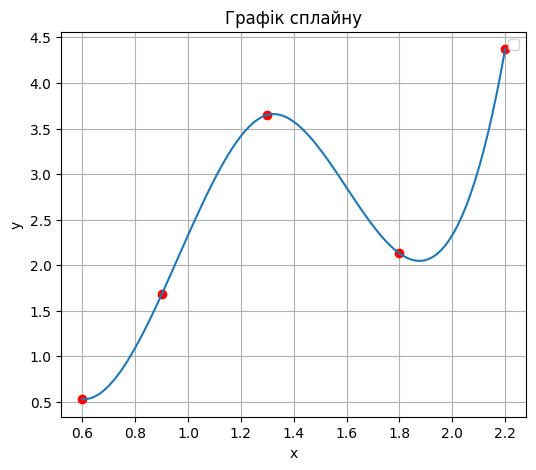

In [2]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

x = np.array([0.6, 0.9, 1.3, 1.8, 2.2])
y = np.array([0.53, 1.68, 3.65, 2.13, 4.37])
n = len(x) - 1
h = np.diff(x)
a = y
b = np.zeros(n)
d = np.zeros(n)
c = np.zeros(n)

m = np.zeros(n)
beta = np.zeros(n)
alpha = np.zeros(n)

k = np.zeros(n)
for i in range(0, n):
  if (i == 0):
    alpha[i] = 0
    beta[i] = 0

  elif (i == 1):
    k[i] = 3*((a[i+1] - a[i])/h[i] - (a[i] - a[i-1])/h[i-1])
    m[i] = 2 * (h[i - 1] + h[i])
    alpha[i] = k[i] / m[i]
    beta[i] = h[i] / m[i]

  else:
    k[i] = 3*((a[i+1] - a[i])/h[i] - (a[i] - a[i-1])/h[i-1])
    m[i] = 2 * (h[i - 1] + h[i])
    beta[i] = (h[i]) / (m[i] - h[i-1] * beta[i-1])
    alpha[i] = (k[i] - h[i-1] * alpha[i-1]) / (m[i] - h[i-1] * beta[i-1])

c[n-1] = alpha[n-1]
for j in range(n-1, -1, -1):
  if (j == n-1):
    b[j] = (a[j+1] - a[j]) / h[j] - h[j] * (0 + 2 * c[j]) / 3
    d[j] = (0 - c[j]) / (3 * h[j])
  else:
    c[j] = alpha[j] - beta[j] * c[j+1]
    b[j] = (a[j+1] - a[j]) / h[j] - h[j] * (c[j+1] + 2 * c[j]) / 3
    d[j] = (c[j+1] - c[j]) / (3 * h[j])

for i in range(n):
    print(f"Відрізок {i+1}:")
    print(f"S_{i}(x) = {a[i]} + {b[i].round(4)}(x - {x[i]}) + {c[i].round(4)}(x - {x[i]})^2 + {d[i].round(4)}(x - {x[i]})^3, x належить [{x[i]}, {x[i+1]}]")

print('-------------------------------------------------------------------------------------------------')

cs = CubicSpline(x, y)
x_new = np.linspace(np.min(x), np.max(x), 100)
y_new = cs(x_new)

plt.figure(figsize=(6, 5))
plt.plot(x, y, 'ro')
plt.plot(x_new, y_new)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Графік сплайну')
plt.legend()
plt.grid(True)
plt.show()